TensorFlow version: 2.18.0

=== Loading and Preparing Dataset ===
Training examples: 14244
Validation examples: 14669

Sample training examples:
Example 1: Negative
Text: <START> big hair big boobs bad music and a giant safety pin these are the words to best describe thi...

Example 2: Negative
Text: <START> this has to be one of the worst films of the 1990s when my friends i were watching this film...

Example 3: Negative
Text: <START> worst mistake of my life br br i picked this movie up at target for 5 because i figured hey ...

Shape of training data: (14244, 200)
Shape of validation data: (14669, 200)

=== Building Transformer Components from Scratch ===

=== Building the Complete Transformer Model ===


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_8       │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_4 (Lambda)   │ (None, 200)       │          0 │ input_layer_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_5 (Lambda)   │ (None, 1, 1, 200) │          0 │ lambda_4[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ transformer_encode… │ (None, 200, 128)  │  2,956,544 │ input_layer_8[0]… │
│ (TransformerEncode… │                   │            │ lambda_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ transformer_enco… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 128)       │          0 │ global_average_p… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_37 (Dense)    │ (None, 1)         │        129 │ dropout_16[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,956,673 (11.28 MB)

 Trainable params: 2,956,673 (11.28 MB)

 Non-trainable params: 0 (0.00 B)


=== Compiling the Model ===

=== Training the Transformer Model ===
Epoch 1/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 31s 71ms/step - accuracy: 0.5978 - loss: 0.6545 - val_accuracy: 0.8410 - val_loss: 0.3573 - learning_rate: 1.0000e-04
Epoch 2/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.8703 - loss: 0.3069 - val_accuracy: 0.8705 - val_loss: 0.3089 - learning_rate: 1.0000e-04
Epoch 3/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9299 - loss: 0.1969 - val_accuracy: 0.8695 - val_loss: 0.3323 - learning_rate: 1.0000e-04
Epoch 4/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.9519 - loss: 0.1390 - val_accuracy: 0.8774 - val_loss: 0.3262 - learning_rate: 2.0000e-05
Time taken for training: 48.82 seconds


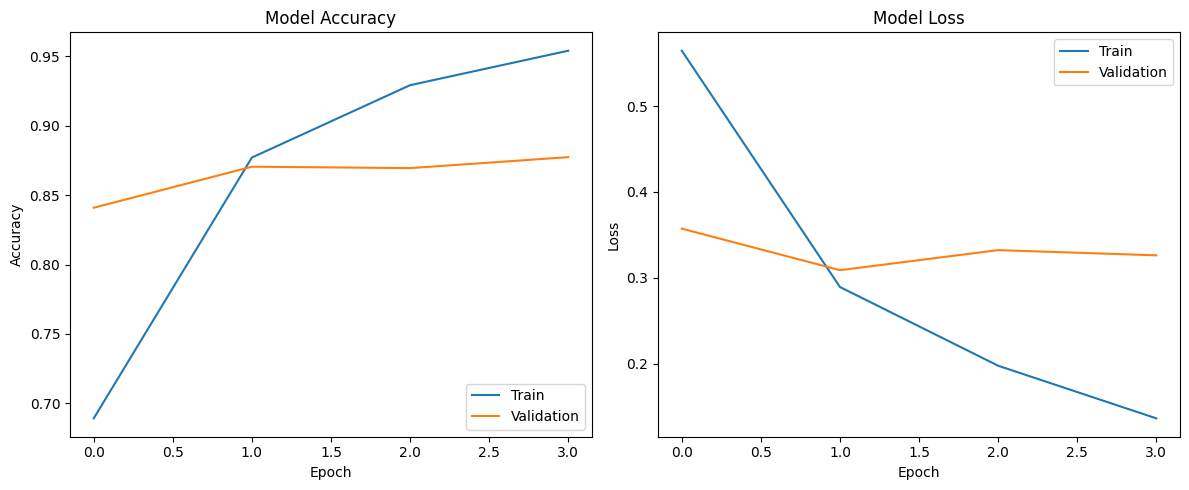


=== Evaluating the Model ===
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8702 - loss: 0.3040
Validation Loss: 0.3089
Validation Accuracy: 0.8705

=== Testing on New Examples ===
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Example 1: This movie was fantastic! I really enjoyed the plot and the acting was superb.
Prediction: Negative (confidence: 0.9543)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Example 2: What a waste of time. Poor acting, terrible script, and boring storyline.
Prediction: Negative (confidence: 1.0000)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Example 3: The movie had good special effects but the story was somewhat confusing.
Prediction: Negative (confidence: 0.8782)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Example 4: I fell asleep halfway through the movie.
Prediction: Negative (confidence: 0.9993)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Example 5: The characters were well-developed and the dialogue was engaging.
Prediction: Negative (confidence: 0.9822)



In [ ]:
# Building and Training a Transformer from Scratch with Keras
# This notebook shows how to build a transformer model for text classification

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import time

print("TensorFlow version:", tf.__version__)

# Set random seed for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

# Load the IMDB dataset for sentiment analysis
print("\n=== Loading and Preparing Dataset ===")

vocab_size = 20000  # Top N words to use in vocabulary
max_sequence_length = 200  # Maximum length of sequences

# Load the dataset
(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=vocab_size,
    maxlen=max_sequence_length
)

print(f"Training examples: {len(x_train)}")
print(f"Validation examples: {len(x_val)}")

# Get the word index mapping
word_index = keras.datasets.imdb.get_word_index()
# Convert to lowercase and offset indices by 3 (for padding, start, unknown tokens)
word_index = {word: (idx + 3) for word, idx in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

# Create reverse word index
reverse_word_index = {idx: word for word, idx in word_index.items()}

# Function to decode the integer sequences back to text
def decode_review(sequence):
    return ' '.join([reverse_word_index.get(i, '?') for i in sequence])

# Print some examples
print("\nSample training examples:")
for i in range(3):
    sentiment = "Positive" if y_train[i] == 1 else "Negative"
    print(f"Example {i+1}: {sentiment}")
    text = decode_review(x_train[i])
    print(f"Text: {text[:100]}...")
    print()

# Function to pad the sequences
def pad_sequences(sequences, maxlen):
    return tf.keras.preprocessing.sequence.pad_sequences(
        sequences, maxlen=maxlen, padding='post'
    )

# Pad the sequences
x_train_padded = pad_sequences(x_train, max_sequence_length)
x_val_padded = pad_sequences(x_val, max_sequence_length)

print(f"Shape of training data: {x_train_padded.shape}")
print(f"Shape of validation data: {x_val_padded.shape}")

# Convert to TensorFlow Dataset for better performance
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_padded, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((x_val_padded, y_val))

# Batch and prefetch for better performance
batch_size = 64
train_dataset = train_dataset.shuffle(buffer_size=10000).batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size).prefetch(buffer_size=tf.data.AUTOTUNE)

# Now let's define the transformer model components from scratch
print("\n=== Building Transformer Components from Scratch ===")

# Positional Encoding Layer
class PositionalEncoding(layers.Layer):
    def __init__(self, position, d_model):
        super(PositionalEncoding, self).__init__()
        self.pos_encoding = self.positional_encoding(position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))
        return position * angles

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],
            d_model=d_model
        )

        # Apply sine to even indices in the array
        sines = tf.math.sin(angle_rads[:, 0::2])
        # Apply cosine to odd indices
        cosines = tf.math.cos(angle_rads[:, 1::2])

        pos_encoding = tf.concat([sines, cosines], axis=-1)
        pos_encoding = pos_encoding[tf.newaxis, ...]

        return tf.cast(pos_encoding, tf.float32)

    def call(self, inputs):
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

# Multi-Head Attention Layer
def scaled_dot_product_attention(query, key, value, mask=None):
    # Calculate dot product of query and key
    matmul_qk = tf.matmul(query, key, transpose_b=True)

    # Scale matmul_qk
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(depth)

    # Add mask if provided
    if mask is not None:
        scaled_attention_logits += (mask * -1e9)

    # Apply softmax to get attention weights
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

    # Apply attention weights to value
    output = tf.matmul(attention_weights, value)

    return output, attention_weights

class MultiHeadAttention(layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0, "d_model must be divisible by num_heads"

        self.depth = d_model // self.num_heads

        self.wq = layers.Dense(d_model)
        self.wk = layers.Dense(d_model)
        self.wv = layers.Dense(d_model)

        self.dense = layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        # Reshape to (batch_size, seq_len, num_heads, depth)
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        # Transpose to (batch_size, num_heads, seq_len, depth)
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, v, k, q, mask=None):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)  # (batch_size, seq_len_q, d_model)
        k = self.wk(k)  # (batch_size, seq_len_k, d_model)
        v = self.wv(v)  # (batch_size, seq_len_v, d_model)

        q = self.split_heads(q, batch_size)  # (batch_size, num_heads, seq_len_q, depth)
        k = self.split_heads(k, batch_size)  # (batch_size, num_heads, seq_len_k, depth)
        v = self.split_heads(v, batch_size)  # (batch_size, num_heads, seq_len_v, depth)

        # Calculate attention
        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask
        )

        # Transpose back to (batch_size, seq_len_q, num_heads, depth)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        # Concatenate heads and put through final dense layer
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))

        output = self.dense(concat_attention)

        return output, attention_weights

# Feed Forward Network
def point_wise_feed_forward_network(d_model, dff):
    return keras.Sequential([
        layers.Dense(dff, activation='relu'),
        layers.Dense(d_model)
    ])

# Encoder Layer
class EncoderLayer(layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, x, training, mask=None):
        # Multi-head attention part
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        # Feed forward part
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)

        return out2

# Transformer Encoder
class TransformerEncoder(layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, rate=0.1):
        super(TransformerEncoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = PositionalEncoding(maximum_position_encoding, d_model)

        self.enc_layers = [
            EncoderLayer(d_model, num_heads, dff, rate)
            for _ in range(num_layers)
        ]

        self.dropout = layers.Dropout(rate)

    def call(self, x, training, mask=None):
        seq_len = tf.shape(x)[1]

        # Embedding and position encoding
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x = self.pos_encoding(x)

        x = self.dropout(x, training=training)

        # Encoder layers
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training=training, mask=mask)


        return x  # (batch_size, seq_len, d_model)

# Now, let's build the complete transformer model for text classification
print("\n=== Building the Complete Transformer Model ===")

def create_transformer_classifier(
    vocab_size,
    num_layers,
    d_model,
    num_heads,
    dff,
    max_sequence_length,
    dropout_rate=0.1,
):
    # Define inputs
    inputs = layers.Input(shape=(max_sequence_length,))

    # Create padding mask to mask out padded tokens
    # We don't actually need padding mask for classification task where we just use the [CLS] token
    # But we'll keep it for completeness and potential model extension
    # Define inputs
    inputs = layers.Input(shape=(max_sequence_length,))

# Wrap the mask logic in a Lambda layer
    padding_mask = layers.Lambda(lambda x: tf.cast(tf.math.equal(x, 0), tf.float32))(inputs)
    padding_mask = layers.Lambda(lambda x: x[:, tf.newaxis, tf.newaxis, :])(padding_mask)


    # Transformer encoder
    encoder = TransformerEncoder(
        num_layers=num_layers,
        d_model=d_model,
        num_heads=num_heads,
        dff=dff,
        input_vocab_size=vocab_size,
        maximum_position_encoding=max_sequence_length,
        rate=dropout_rate
    )

    # Get encoder output
    encoder_output = encoder(inputs, training=True, mask=padding_mask)

    # Global average pooling across sequence dimension for classification
    pooled_output = layers.GlobalAveragePooling1D()(encoder_output)

    # Add a dropout layer for regularization
    pooled_output = layers.Dropout(dropout_rate)(pooled_output)

    # Final dense layer for classification
    outputs = layers.Dense(1, activation='sigmoid')(pooled_output)

    # Create the model
    model = keras.Model(inputs=inputs, outputs=outputs)

    return model

# Set model hyperparameters
num_layers = 2  # Number of transformer encoder layers
d_model = 128    # Embedding dimension
num_heads = 8    # Number of attention heads
dff = 512       # Feed forward network dimension
dropout_rate = 0.1

# Create the transformer model
transformer_model = create_transformer_classifier(
    vocab_size=vocab_size,
    num_layers=num_layers,
    d_model=d_model,
    num_heads=num_heads,
    dff=dff,
    max_sequence_length=max_sequence_length,
    dropout_rate=dropout_rate
)

# Print model summary
transformer_model.summary()

# Compile the model
print("\n=== Compiling the Model ===")
transformer_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss=keras.losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

# Define callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=1
)

# Train the model
print("\n=== Training the Transformer Model ===")
epochs = 5

start_time = time.time()
history = transformer_model.fit(
    train_dataset,
    epochs=epochs,
    validation_data=val_dataset,
    callbacks=[early_stopping, reduce_lr])

end_time = time.time()
print(f"Time taken for training: {end_time - start_time:.2f} seconds")

# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()

# Evaluate the model on the validation set
print("\n=== Evaluating the Model ===")
evaluation = transformer_model.evaluate(val_dataset)
print(f"Validation Loss: {evaluation[0]:.4f}")
print(f"Validation Accuracy: {evaluation[1]:.4f}")

# Test on some examples
print("\n=== Testing on New Examples ===")

# Function to preprocess new text
def preprocess_text(text):
    # Convert text to word indices
    words = text.lower().split()
    sequence = []
    for word in words:
        if word in word_index:
            sequence.append(word_index[word])
        else:
            sequence.append(word_index["<UNK>"])
    # Pad sequence
    padded_sequence = pad_sequences([sequence], max_sequence_length)
    return padded_sequence

# Test examples
test_examples = [
    "This movie was fantastic! I really enjoyed the plot and the acting was superb.",
    "What a waste of time. Poor acting, terrible script, and boring storyline.",
    "The movie had good special effects but the story was somewhat confusing.",
    "I fell asleep halfway through the movie.",
    "The characters were well-developed and the dialogue was engaging."
]

for i, text in enumerate(test_examples):
    # Preprocess the text
    processed_text = preprocess_text(text)
    # Make prediction
    prediction = transformer_model.predict(processed_text)[0][0]
    sentiment = "Positive" if prediction >= 0.5 else "Negative"
    confidence = prediction if sentiment == "Positive" else 1 - prediction
    print(f"Example {i+1}: {text}")
    print(f"Prediction: {sentiment} (confidence: {confidence:.4f})")
    print()



In [ ]:
# Save the model
print("\n=== Saving the Model ===")
model_save_path = "./transformer_sentiment_classifier.keras"
transformer_model.save(model_save_path)
print(f"Model saved to {model_save_path}")

# Let's write a visualization function for the attention weights
print("\n=== Attention Visualization Function ===")
print("Note: To visualize attention weights, you would need to modify the model to return attention weights")

def visualize_attention(model, text, layer_index=0, head_index=0):
    """
    Function to visualize attention weights for a given text.
    Note: This is a template function. The actual implementation would require
    modifying the transformer model to return attention weights.
    """
    print("Attention visualization function template:")
    print("1. Preprocess the input text")
    print("2. Run the model and extract attention weights")
    print("3. Plot the attention matrix as a heatmap")
    print("4. Display the words and their attention scores")

    # Example code (not functional without model modifications):
    """
    # Preprocess text
    processed_text = preprocess_text(text)

    # Get attention weights (assuming model was modified to return them)
    _, attention_weights = model(processed_text, training=False)

    # Extract weights for the specified layer and head
    attention = attention_weights[layer_index][0, head_index].numpy()

    # Create a heatmap
    plt.figure(figsize=(10, 10))
    plt.imshow(attention, cmap='viridis')

    # Add words as axis labels
    words = text.split()
    plt.xticks(range(len(words)), words, rotation=90)
    plt.yticks(range(len(words)), words)

    plt.colorbar()
    plt.title(f'Attention weights for layer {layer_index}, head {head_index}')
    plt.tight_layout()
    plt.show()
    """

print("\n=== Summary and Next Steps ===")
print("You've successfully built and trained a transformer model from scratch for sentiment analysis!")
print("Possible next steps:")
print("1. Try different hyperparameters (more layers, different learning rates, etc.)")
print("2. Modify the model architecture (e.g., add residual connections)")
print("3. Use a larger dataset or pretrained word embeddings")
print("4. Implement attention visualization")
print("5. Try different tasks like text generation or translation")
print("6. Add more sophisticated regularization techniques")

print("\nComplete! You've successfully built a transformer from scratch for text classification.")


=== Saving the Model ===
Model saved to ./transformer_sentiment_classifier.keras

=== Attention Visualization Function ===
Note: To visualize attention weights, you would need to modify the model to return attention weights

=== Summary and Next Steps ===
You've successfully built and trained a transformer model from scratch for sentiment analysis!
Possible next steps:
1. Try different hyperparameters (more layers, different learning rates, etc.)
2. Modify the model architecture (e.g., add residual connections)
3. Use a larger dataset or pretrained word embeddings
4. Implement attention visualization
5. Try different tasks like text generation or translation
6. Add more sophisticated regularization techniques

Complete! You've successfully built a transformer from scratch for text classification.
